In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import *
import seaborn as sns
from matplotlib import cm
import scipy.stats as st
import csv

plt.rcParams.update({'font.size': 7})
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams["xtick.major.size"] = 2
plt.rcParams["ytick.major.size"] = 2
plt.rcParams["xtick.major.width"] = 0.5
plt.rcParams["ytick.major.width"] = 0.5

antibody = "CH65"
antigens = ["SI06"] 
L = 16
df = pd.read_csv("../../Kd_Inference/results_CH65/Kd_processed/20220603_Y35N_G31D_M34I_H35N_N52H.csv", dtype={"geno":"str"})
df['SI06_mean_neg']=-df['SI06_mean']
df

,geno,repa_x,repb_x,MA90_mean,MA90_sem,repa_y,repb_y,SI06_mean,SI06_sem,repa,...,pos9,pos10,pos11,pos12,pos13,pos14,pos15,pos16,som_mut,SI06_mean_neg
0,0000000000000000,8.612721,8.472320,8.542521,0.070200,6.000000,6.000000,6.000000,0.000000,6.000000,...,0,0,0,0,0,0,0,0,0,-6.000000
1,0000000000100000,8.950926,8.924759,8.937843,0.013083,6.000000,6.000000,6.000000,0.000000,7.024656,...,0,0,1,0,0,0,0,0,1,-6.000000
2,0000000001000000,8.749807,8.638036,8.693922,0.055886,6.000000,6.000000,6.000000,0.000000,6.000000,...,0,1,0,0,0,0,0,0,1,-6.000000
3,0000000010000000,8.606172,8.617547,8.611859,0.005688,6.000000,6.000000,6.000000,0.000000,6.000000,...,1,0,0,0,0,0,0,0,1,-6.000000
4,0000001000000000,8.802304,8.764443,8.783374,0.018930,6.000000,6.000000,6.000000,0.000000,6.000000,...,0,0,0,0,0,0,0,0,1,-6.000000
5,0010000000000000,9.294895,9.278859,9.286877,0.008018,6.000000,6.000000,6.000000,0.000000,7.568305,...,0,0,0,0,0,0,0,0,1,-6.000000
6,0010001000000000,9.650265,9.552610,9.601438,0.048828,6.000000,6.000000,6.000000,0.000000,8.638979,...,0,0,0,0,0,0,0,0,2,-6.000000
7,0010000000100000,9.607407,9.560022,9.583714,0.023693,6.771168,6.548373,6.659770,0.111398,8.452973,...,0,0,1,0,0,0,0,0,2,-6.659770
8,0010000010000000,9.360523,9.277743,9.319133,0.041390,6.000000,6.000000,6.000000,0.000000,7.715204,...,1,0,0,0,0,0,0,0,2,-6.000000
9,0000001000100000,8.945468,8.932128,8.938798,0.006670,6.000000,6.000000,6.000000,0.000000,7.831816,...,0,0,1,0,0,0,0,0,2,-6.000000


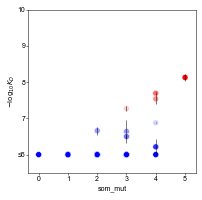

In [39]:
fig = plt.figure(figsize=(3,3))
plt.errorbar(x=df.som_mut, y=df.SI06_mean, yerr=df.SI06_sem, fmt='none',color='k', elinewidth=0.5)
sns.scatterplot(data=df, y='SI06_mean', x='som_mut',hue='SI06_mean',palette='bwr',legend=False)
plt.ylabel(r'$-\log_{10}K_D$',labelpad=0)
plt.ylim([5.5,10])
plt.tick_params(pad=1)
plt.yticks([6,7,8,9,10],['≤6','7','8','9','10'],fontsize=7)
plt.title('',fontsize=7)
plt.xticks([0,1,2,3,4,5],['0','1','2','3','4','5'],fontsize=7)
#plt.tight_layout()

plt.savefig('images/SI06_ep_picks.png',dpi=1200)
plt.show()

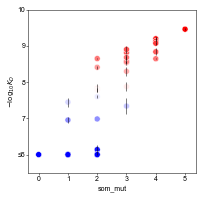

In [41]:
fig = plt.figure(figsize=(3,3))
plt.errorbar(x=df.som_mut, y=df.G189E_mean, yerr=df.G189E_sem, fmt='none',color='k', elinewidth=0.5)
sns.scatterplot(data=df, y='G189E_mean', x='som_mut',hue='G189E_mean',palette='bwr',legend=False)
plt.ylabel(r'$-\log_{10}K_D$',labelpad=0)
plt.ylim([5.5,10])
plt.tick_params(pad=1)
plt.yticks([6,7,8,9,10],['≤6','7','8','9','10'],fontsize=7)
plt.title('',fontsize=7)
plt.xticks([0,1,2,3,4,5],['0','1','2','3','4','5'],fontsize=7)
#plt.tight_layout()

plt.savefig('images/G189E_ep_picks.png',dpi=1200)
plt.show()

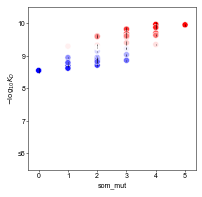

In [43]:
fig = plt.figure(figsize=(3,3))
plt.errorbar(x=df.som_mut, y=df.MA90_mean, yerr=df.MA90_sem, fmt='none',color='k', elinewidth=0.5)
sns.scatterplot(data=df, y='MA90_mean', x='som_mut',hue='MA90_mean',palette='bwr',legend=False)
plt.ylabel(r'$-\log_{10}K_D$',labelpad=0)
plt.ylim([5.5,10.5])
plt.tick_params(pad=1)
plt.yticks([6,7,8,9,10],['≤6','7','8','9','10'],fontsize=7)
plt.title('',fontsize=7)
plt.xticks([0,1,2,3,4,5],['0','1','2','3','4','5'],fontsize=7)
#plt.tight_layout()

plt.savefig('images/MA90_ep_picks.png',dpi=1200)
plt.show()